<a href="https://colab.research.google.com/github/Jarnoesse/IA-AGN-with-ML/blob/main/Dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
 
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
 
import seaborn as sns

In [44]:
table_RACS_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_DES_PS1_SkyMapper_specZ_milliquas_v3.fits.gz'
table_RACS_cat = Table.read(table_RACS_catalogue_URL)

table_RACS_cat_df = table_RACS_cat.to_pandas() # convert to Pandas Dataframe

In [45]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES","z_spec_1","spec_class_1"]
DES_df = table_RACS_cat_df[attributes].copy()

attributes = ["GPETMAG_PS","RPETMAG_PS","IPETMAG_PS","ZPETMAG_PS","YPETMAG_PS","z_spec_2","class_2_2"]
PS_df = table_RACS_cat_df[attributes].copy()

attributes = ["U_PETRO_SM","V_PETRO_SM","G_PETRO_SM","R_PETRO_SM","I_PETRO_SM","Z_PETRO_SM","z_spec_3","spec_class_3"]
SM_df = table_RACS_cat_df[attributes].copy()

In [46]:
DES_df  = DES_df[DES_df["spec_class_1"]>=0]

PS_df = PS_df[PS_df["class_2_2"]>=0]


SM_df = SM_df[SM_df["U_PETRO_SM"] >= 0]
SM_df = SM_df[SM_df["z_spec_3"] >= 0]


In [47]:
DES_df.info(null_counts=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12157 entries, 2 to 259245
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MAG_AUTO_G_DES  12157 non-null  float32
 1   MAG_AUTO_R_DES  12157 non-null  float32
 2   MAG_AUTO_I_DES  12157 non-null  float32
 3   MAG_AUTO_Z_DES  12157 non-null  float32
 4   MAG_AUTO_Y_DES  12157 non-null  float32
 5   z_spec_1        12157 non-null  float64
 6   spec_class_1    12157 non-null  Int16  
dtypes: Int16(1), float32(5), float64(1)
memory usage: 463.0 KB


In [48]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES"]

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy

colors = DES_df["spec_class_1"].map(lambda x: color_wheel.get(x))

In [69]:
DES_df['spec_class_1'].value_counts()

2    11048
1     1038
0       71
Name: spec_class_1, dtype: Int64

###FACTOR ANALYSIS ALGORYTHM

In [49]:
from sklearn.decomposition import FactorAnalysis

In [50]:
transformer = FactorAnalysis(n_components = 7, random_state = 0)
transformed = transformer.fit_transform(DES_df[attributes].values)

In [51]:
transformed.shape

(12157, 5)

In [52]:
DES_df[attributes].values.shape

(12157, 5)

In [53]:
attributes = ["x","y","","","",]
df = pd.DataFrame(columns=attributes,data=transformed)

In [54]:
 attributes = ["x","y"]
 df1 = df[attributes]

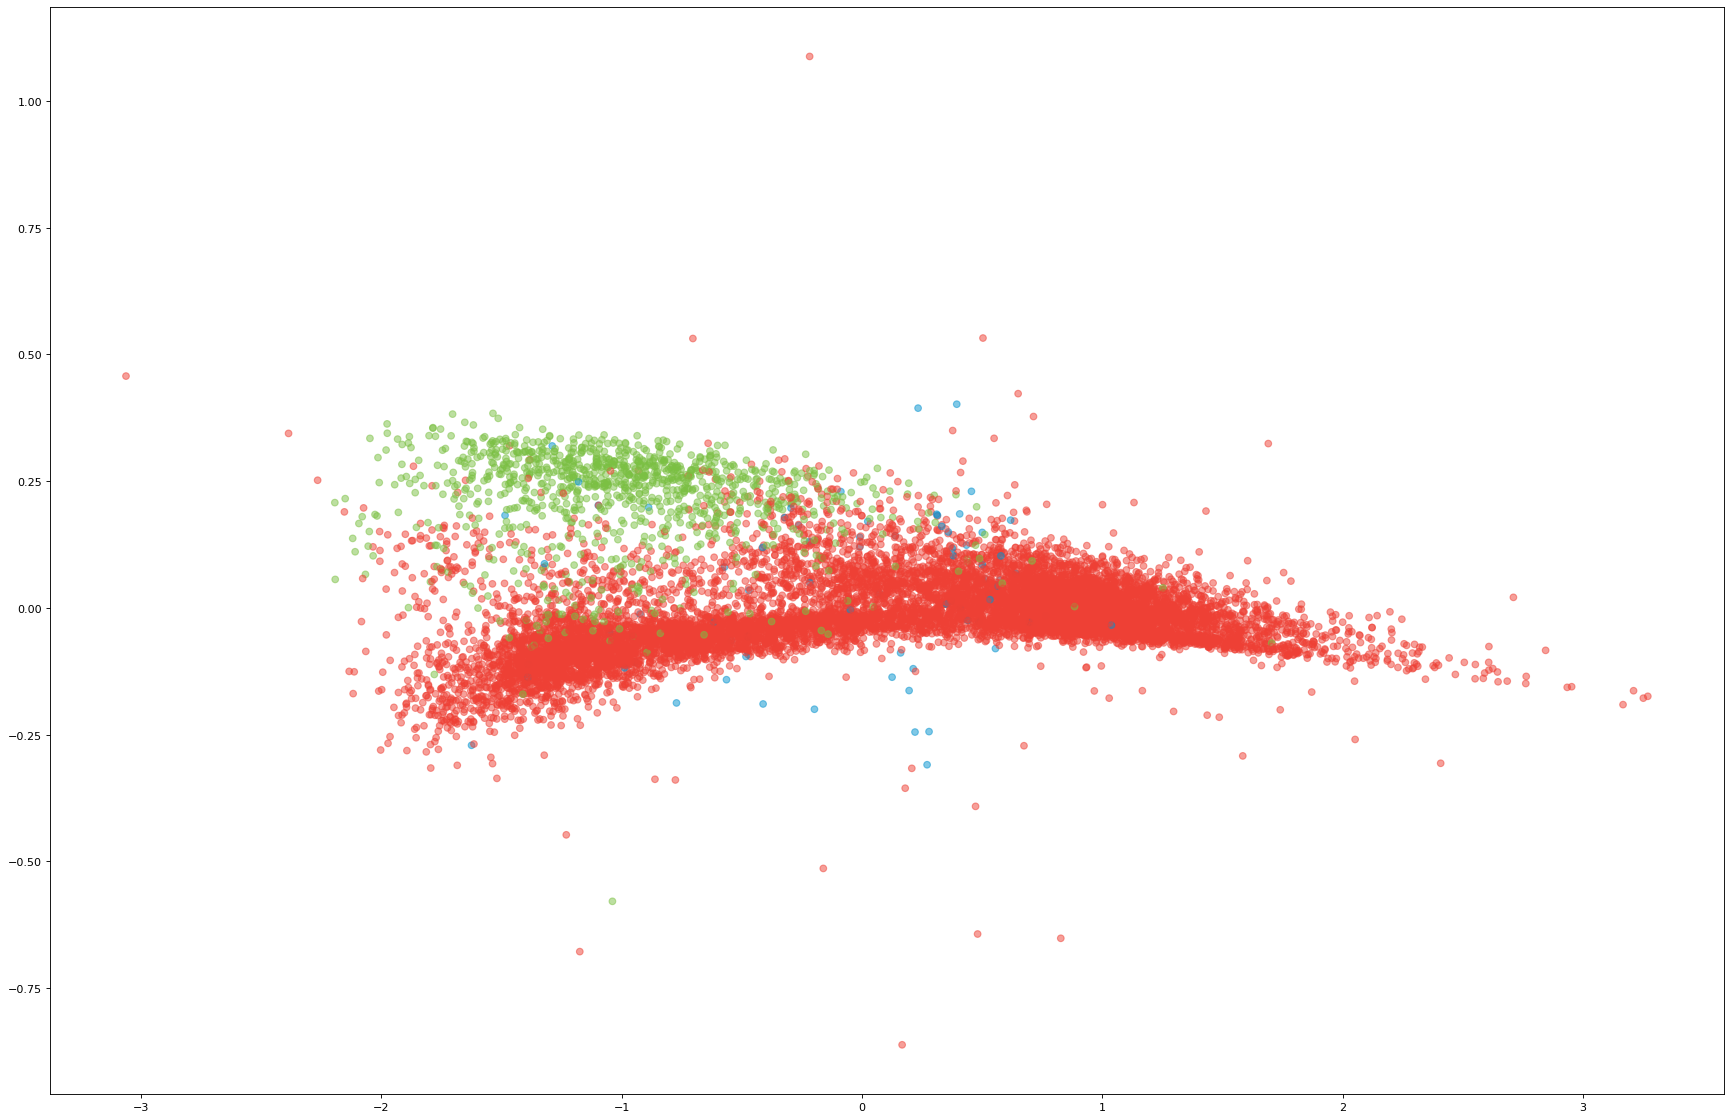

In [55]:
plt.figure(figsize=(27, 18), dpi=80)
plt.scatter(df1["x"],df1["y"],c=colors,alpha = 0.5)


###KERNEL PCA

In [56]:
from sklearn.decomposition import KernelPCA

In [57]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES"]
transformer = KernelPCA(n_components = 2, kernel='linear')
transformed = transformer.fit_transform(DES_df[attributes].values)


In [58]:
attributes = ["x","y"]
df = pd.DataFrame(columns=attributes,data=transformed) 
attributes = ["x","y"]
df2 = df[attributes]

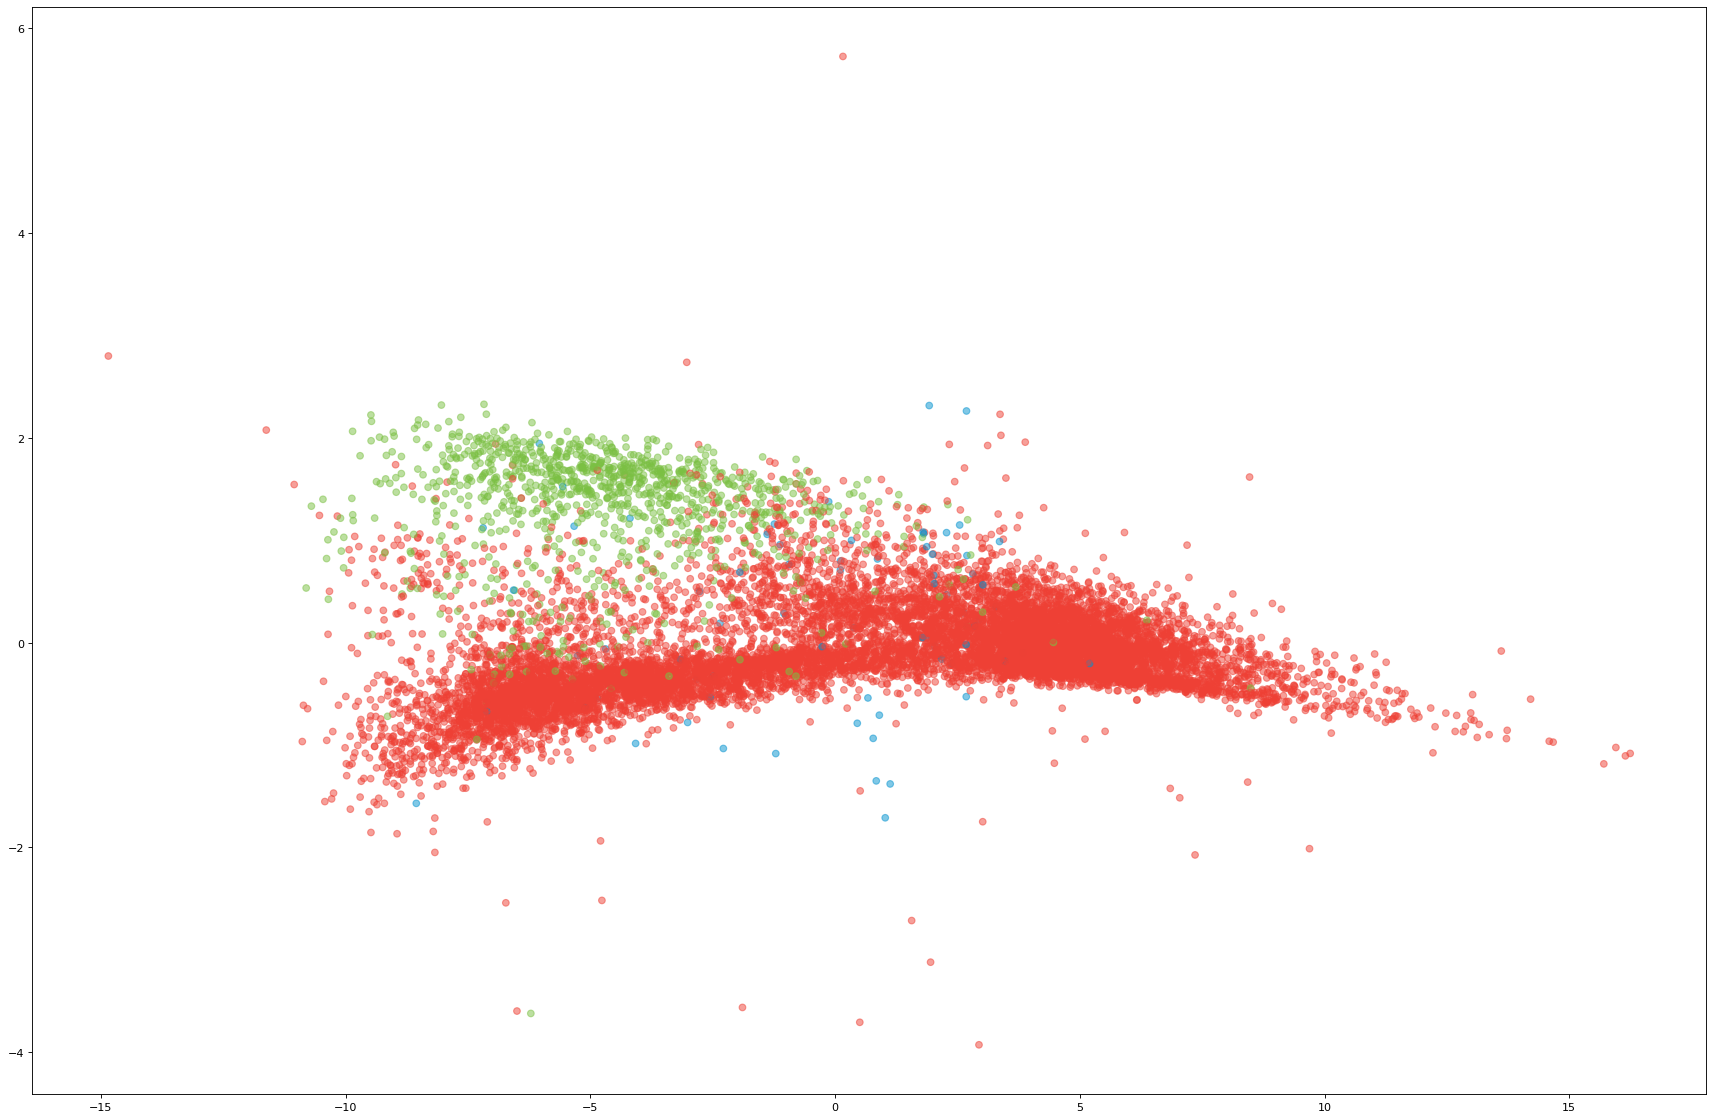

In [59]:
plt.figure(figsize=(27, 18), dpi=80)
plt.scatter(df2["x"],df2["y"],c=colors,alpha = 0.5)


ISOMAP

In [60]:
from sklearn.manifold import Isomap

In [61]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES"]
transformer = Isomap(n_components = 2)
transformed = transformer.fit_transform(DES_df[attributes].values)


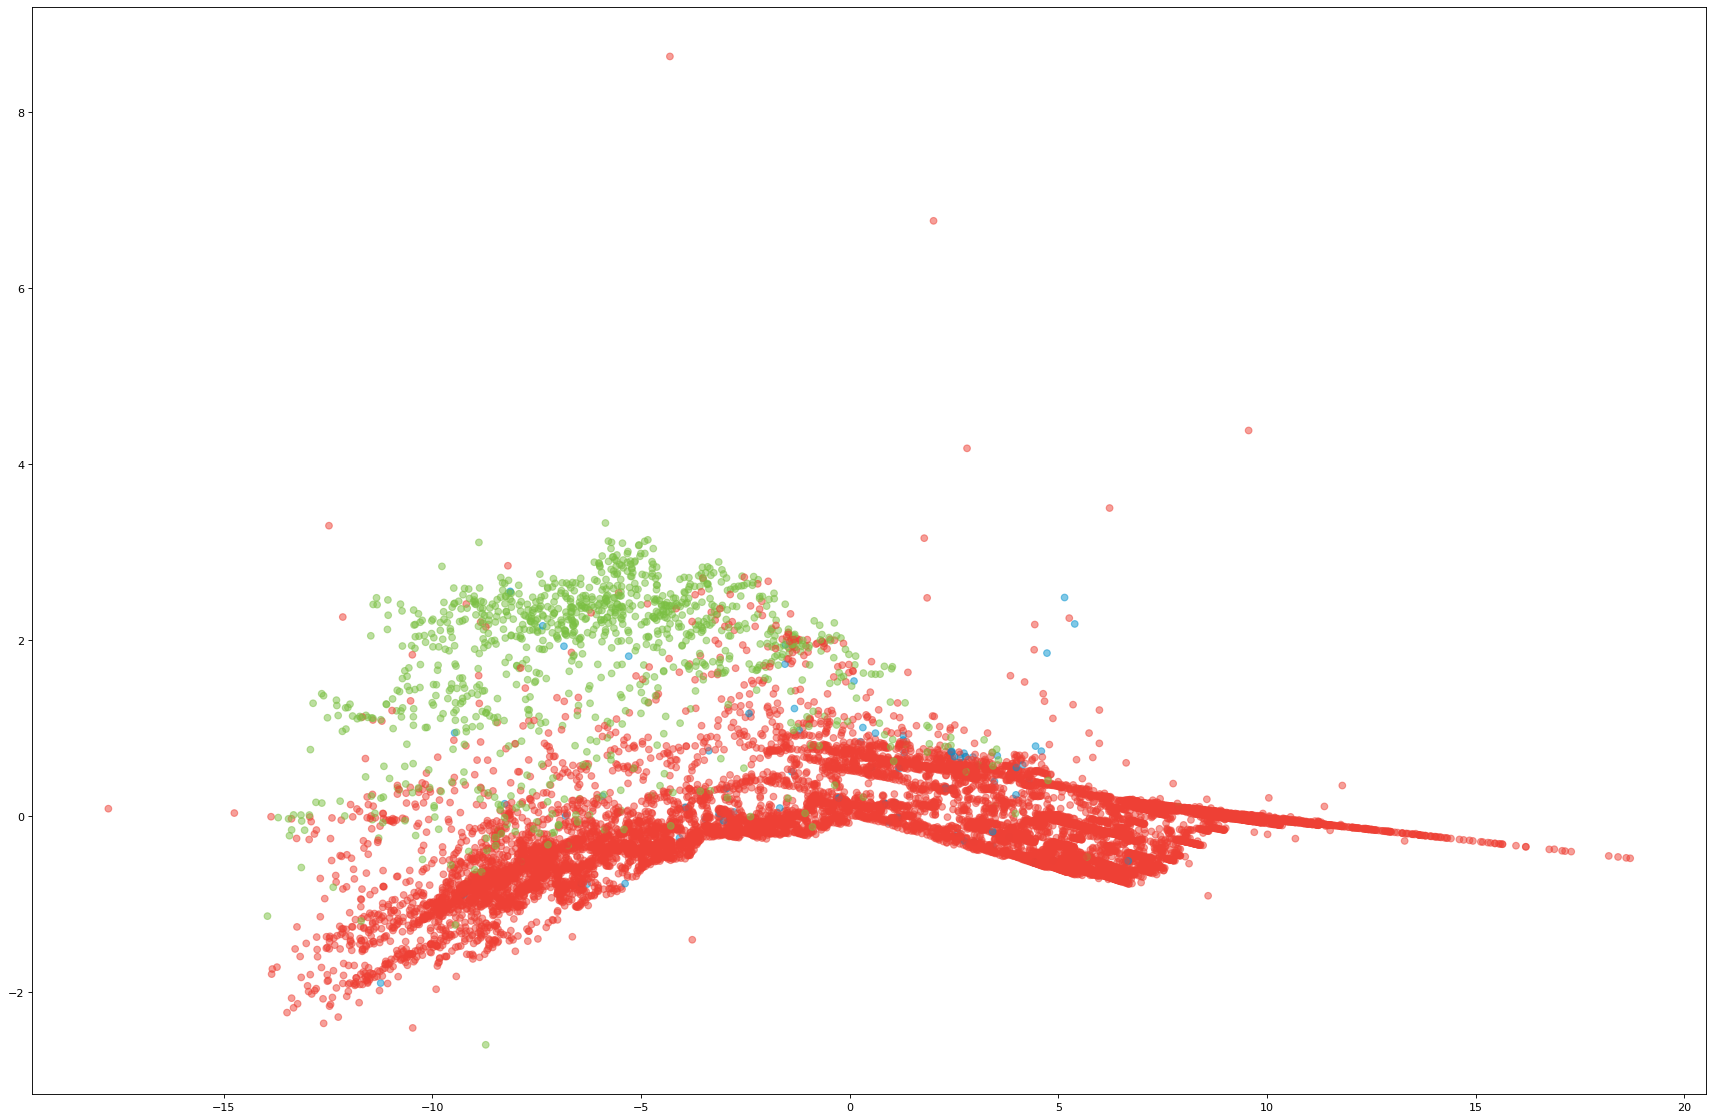

In [62]:
attributes = ["x","y"]
df = pd.DataFrame(columns=attributes,data=transformed) 
attributes = ["x","y"]
df3 = df[attributes]
plt.figure(figsize=(27, 18), dpi=80)
plt.scatter(df3["x"],df3["y"],c=colors,alpha = 0.5)


Random forest testing


In [63]:
from sklearn.ensemble import RandomForestClassifier  #importing random classifier

In [93]:
train_x = df1.iloc[1201:,:].to_numpy()                              #splitting test and train data from the first dataset with the first dimension reduction applied

test_x = df1.iloc[:1200,:].to_numpy()
test_y = DES_df.spec_class_1.iloc[:1200].to_numpy().astype("int")


In [109]:
DES_df.spec_class_1.iloc[:1200].value_counts()

2    1150
1      41
0       9
Name: spec_class_1, dtype: Int64

In [94]:
test_x #visualize my test x to be sure all went well

array([[ 0.68487195,  0.00483126],
       [-0.20078672,  0.26148993],
       [-1.22670414,  0.27159434],
       ...,
       [ 0.31872259,  0.10591754],
       [ 1.45242161,  0.00293609],
       [-0.57963184, -0.03178802]])

In [80]:
#define model
model = RandomForestClassifier(n_estimators=10,class_weight='balanced_subsample')

In [81]:
model.fit(train_x,train_y) #fitting the model with the train data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [97]:
prediction = model.predict(test_x) #making the prediction array

In [96]:
test_y #visualizing the test y 

array([2, 1, 1, ..., 2, 2, 2])

In [101]:
right = 0
wrong = 0
for i in range(0,len(prediction)):
  if (prediction[i]==test_y[i]):
    right = right +1
  else:
    wrong = wrong +1
    print(prediction[i]) #it print wrong values, apparently it detect stars really well  (Are there stars in the test set?????) MUST CHECK
print("right ", right, " wrong ",wrong)

2
2
2
2
1
1
2
1
2
2
1
1
2
1
1
2
1
1
2
2
1
1
2
1
2
2
2
giuste  1173  sbagliate  27


Let's try with the second data reduction algorythm


In [102]:
train_x = df2.iloc[1201:,:].to_numpy()                              #splitting test and train data from the first dataset with the first dimension reduction applied
test_x = df2.iloc[:1200,:].to_numpy()

In [103]:
model.fit(train_x,train_y) #fitting the model with the train data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [104]:
prediction = model.predict(test_x) #making the prediction array
right = 0
wrong = 0
for i in range(0,len(prediction)):
  if (prediction[i]==test_y[i]):
    right = right +1
  else:
    wrong = wrong +1
    print(prediction[i]) #it print wrong values, apparently it detect stars really well  (Are there stars in the test set?????) MUST CHECK
print("right ", right, " wrong ",wrong)

2
1
2
2
2
1
2
2
1
1
2
1
2
2
2
1
1
2
0
1
2
1
1
2
2
1
2
1
2
right  1171  wrong  29


Third one

In [105]:
train_x = df3.iloc[1201:,:].to_numpy()                              #splitting test and train data from the first dataset with the first dimension reduction applied
test_x = df3.iloc[:1200,:].to_numpy()

In [106]:
model.fit(train_x,train_y) #fitting the model with the train data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [107]:
prediction = model.predict(test_x) #making the prediction array
right = 0
wrong = 0
for i in range(0,len(prediction)):
  if (prediction[i]==test_y[i]):
    right = right +1
  else:
    wrong = wrong +1
    print(prediction[i]) #it print wrong values, apparently it detect stars really well  (Are there stars in the test set?????) MUST CHECK
print("right ", right, " wrong ",wrong)

2
2
1
2
2
2
2
1
1
2
1
2
1
2
1
2
2
2
1
1
2
2
2
1
2
2
1
1
2
1
1
1
2
right  1167  wrong  33
